In [2]:
import zipfile
import os

archive_path = 'house-prices-advanced-regression-techniques.zip'
extract_to = 'house_prices'

if not os.path.exists(extract_to):
    os.makedirs(extract_to)

with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    
os.listdir(extract_to)


['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [3]:
import pandas as pd

file_path = 'house_prices/train.csv'

df = pd.read_csv(file_path)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values.sort_values(ascending=False)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [5]:
# Удалим столбцы с множеством пропусков
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
df = df.drop(columns=cols_to_drop)

In [7]:
# Заполняем пропуски
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# Для столбцов с информацией о гараже
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    df[col] = df[col].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [8]:
# Заполняем столбцы о подвале
bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for col in bsmt_cols:
    df[col] = df[col].fillna('None')

# Остальные столбцы
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [9]:
# Проверим, остались ли пропущенные значения
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Вывод оставшихся пропусков (если они есть)
missing_values

Series([], dtype: int64)

In [10]:
# Проверим, есть ли дубликаты
duplicates = df.duplicated()

# Количество дубликатов
print(f"Количество дубликатов: {duplicates.sum()}")

Количество дубликатов: 0


In [11]:
# Посмотрим на типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
# Преобразуем GarageYrBlt в int
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

In [13]:
# Применяем one-hot encoding ко всем категориальным столбцам
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Проверим, сколько теперь столбцов
print(f"Количество столбцов после кодирования: {df.shape[1]}")

df.head()

Количество столбцов после кодирования: 248


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [15]:
# Вывести названия всех столбцов
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=248)

### Каково распределение целевой переменной SalePrice? Есть ли выбросы в SalePrice?

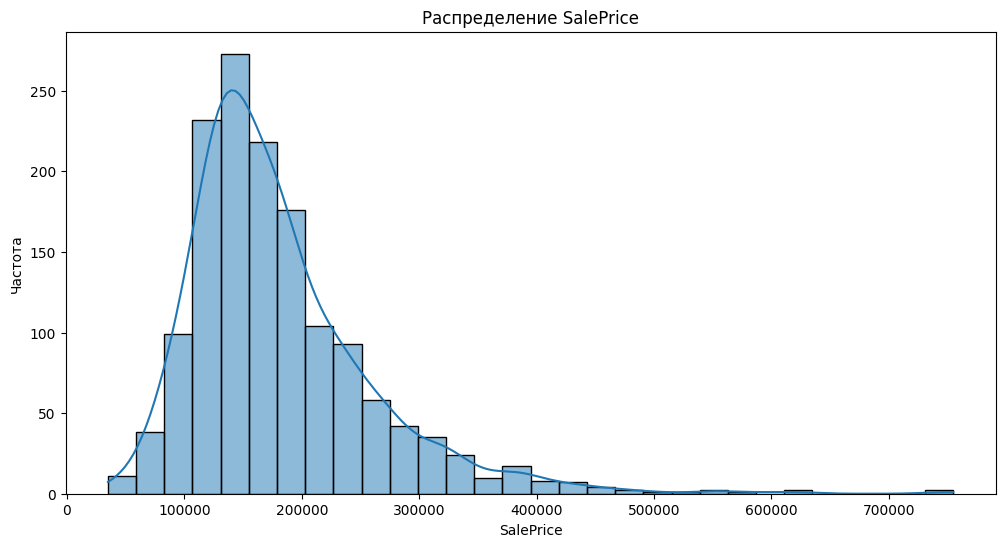

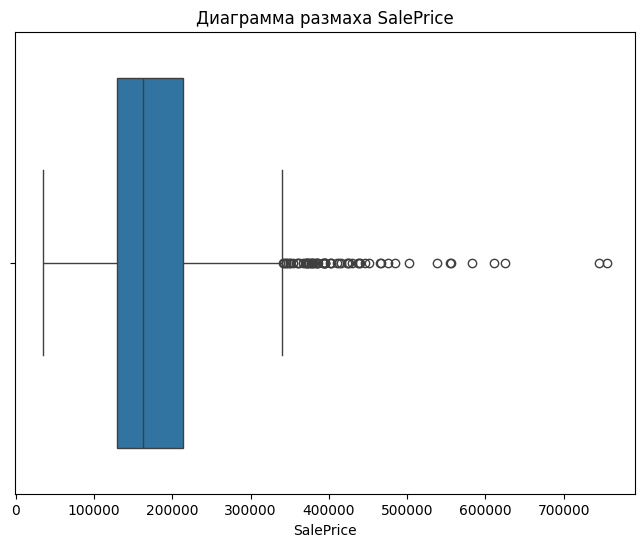

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Диаграмма размаха SalePrice')
plt.show()

### Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?

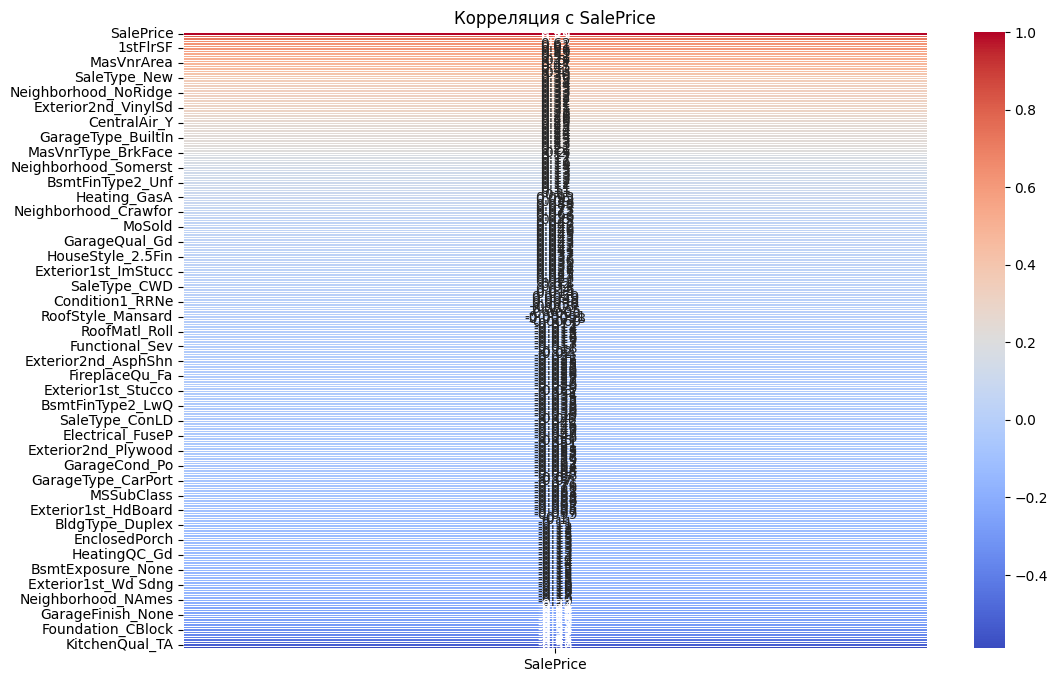

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция с SalePrice')
plt.show()

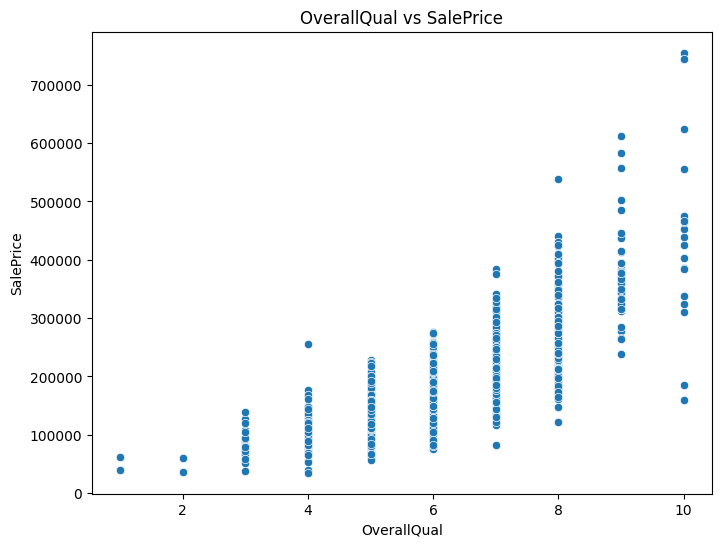

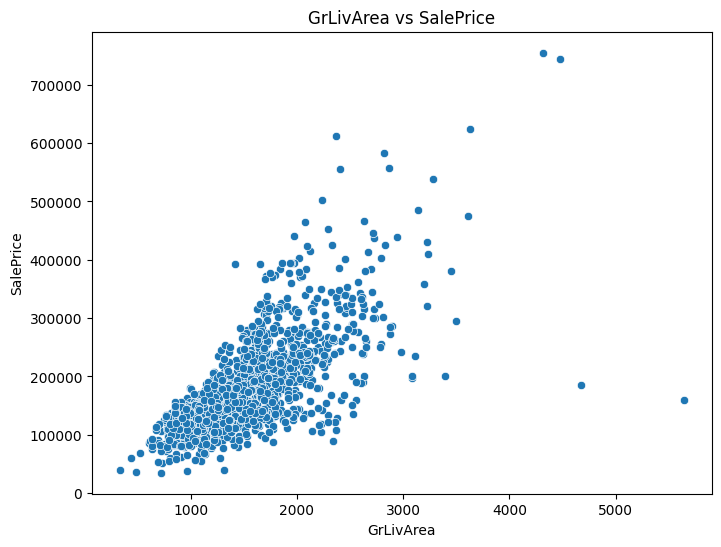

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

### Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д.

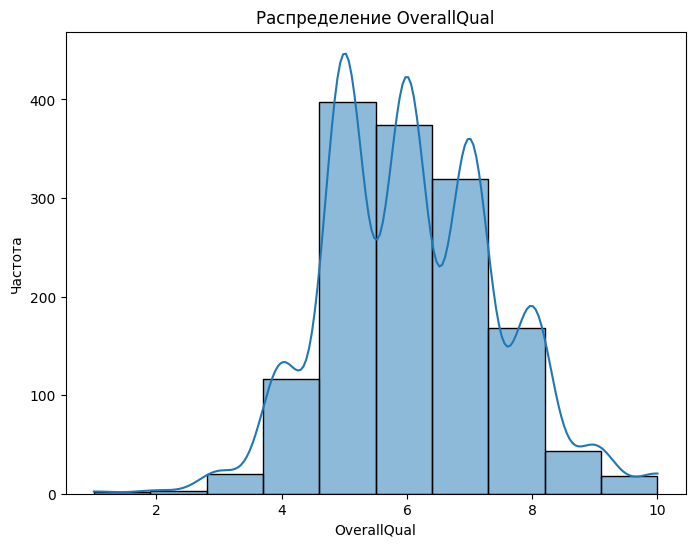

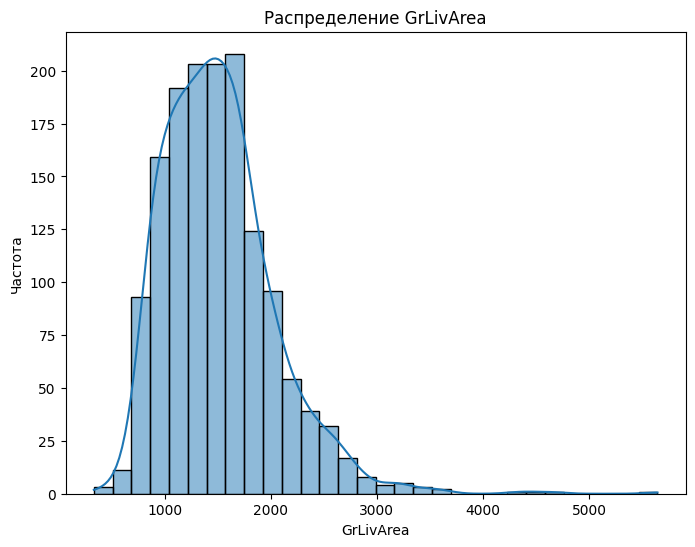

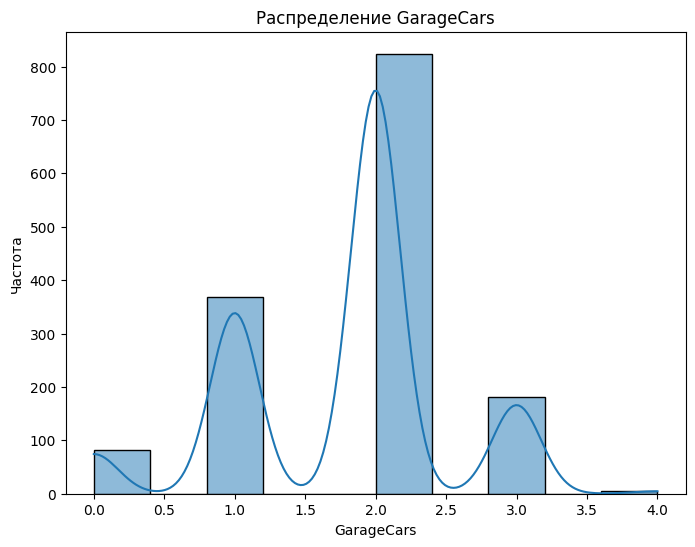

In [20]:
# Гистограмма для OverallQual
plt.figure(figsize=(8, 6))
sns.histplot(df['OverallQual'], kde=True, bins=10)
plt.title('Распределение OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Частота')
plt.show()

# Гистограмма для GrLivArea
plt.figure(figsize=(8, 6))
sns.histplot(df['GrLivArea'], kde=True, bins=30)
plt.title('Распределение GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Частота')
plt.show()

# Гистограмма для GarageCars
plt.figure(figsize=(8, 6))
sns.histplot(df['GarageCars'], kde=True, bins=10)
plt.title('Распределение GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('Частота')
plt.show()

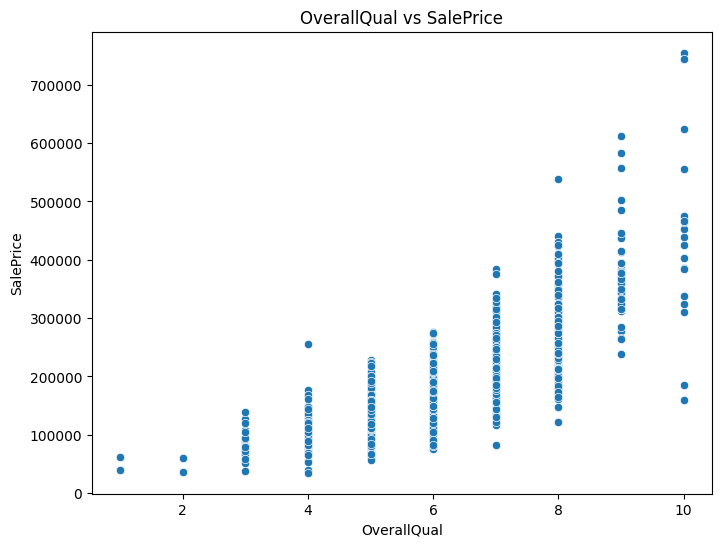

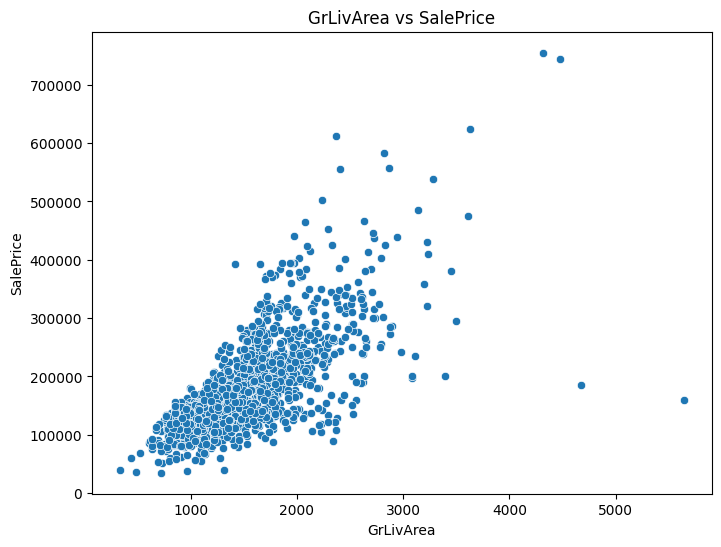

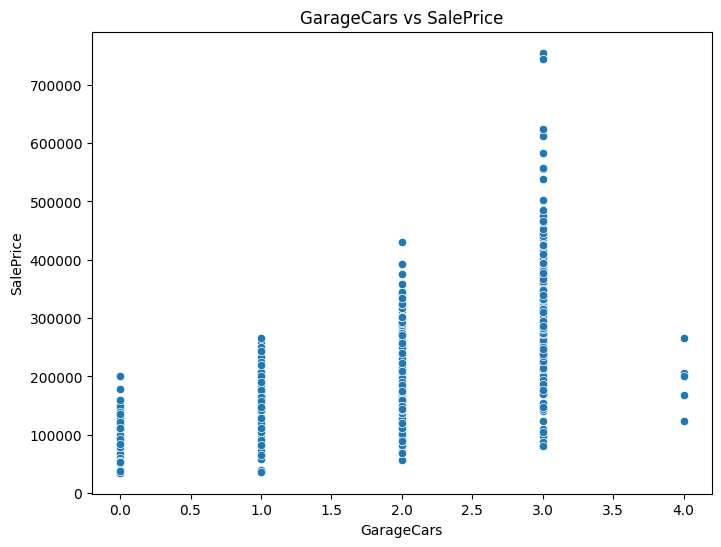

In [21]:
# Диаграмма рассеяния для OverallQual и SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('OverallQual vs SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

# Диаграмма рассеяния для GrLivArea и SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

# Диаграмма рассеяния для GarageCars и SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['GarageCars'], y=df['SalePrice'])
plt.title('GarageCars vs SalePrice')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

### Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [22]:
# Получаем все категориальные столбцы
categorical_columns = df.select_dtypes(include=['object']).columns

# Применяем one-hot encoding ко всем категориальным переменным
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Проверим размерность датасета после кодирования
print(f'Количество столбцов после кодирования: {df_encoded.shape[1]}')

Количество столбцов после кодирования: 248


In [23]:
# Создание нового признака "Возраст дома"
df_encoded['AgeOfHouse'] = df_encoded['YrSold'] - df_encoded['YearBuilt']

# Создание нового признака "Общая площадь" (жилая площадь + площадь подвала)
df_encoded['TotalArea'] = df_encoded['GrLivArea'] + df_encoded['TotalBsmtSF']

### Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [24]:
df_encoded.to_csv('cleaned_house_prices.csv', index=False)

print('Датасет сохранен в файл "cleaned_house_prices.csv"')

Датасет сохранен в файл "cleaned_house_prices.csv"
